AttributeError: 'Rectangle' object has no attribute 'ax'

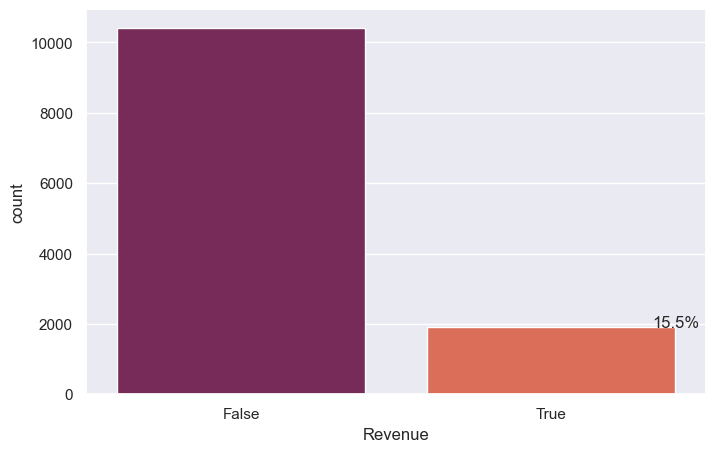

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Jul 15 00:01:25 2022

@author: niphomkhwane
"""

# 1. Library import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

#2. Data upload
import io
#define the path for the data
path = r'/Users/niphomkhwane/Documents/Machine Learning and Decision Making/'
myfile = pd.read_csv(os.path.join(path, 'python', 'online_shoppers_intention.csv'))

#3. Obtain dataset size
myfile.shape

#4. Pull first 10 records
myfile.head(10)

#5. Get the descriptive statistics of the dataset
myfile.describe()

#6. Count of Missing values
mv=myfile.isnull().sum()
mv


def autolabel(rects, fmt='.2f'):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        rect.axes.annotate(f'{{:{fmt}}}'.format(height),
                           xy=(rect.get_x()+rect.get_width()/2., height),
                           xytext=(0, 3), textcoords='offset points',
                           ha='center', va='bottom')

#7. Percentage of customers who've brought revenue
import seaborn as sns
sns.set(style="darkgrid")
plt.figure(figsize=(8,5))
total = float(len(myfile))
ax = sns.countplot(x="Revenue", data=myfile, palette="rocket")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)

x = p.get_x() + p.get_width()
y = p.get_height()
ax.annotate(percentage, (x, y),ha='center')
x
autolabel(p.ax.patches)
plt.show()

#8. Distribution of VisitorType
myfile['VisitorType'].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize=(8,5))
total = float(len(myfile))
ax = sns.countplot(x="VisitorType", data=myfile, palette="rocket")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
x = p.get_x() + p.get_width()
y = p.get_height()
ax.annotate(percentage, (x, y),ha='center')
plt.show()

#9. Percentage distribution of ‘VisitorType’ over the ‘Weekend’
x,y = 'VisitorType', 'Weekend'
df1 = myfile.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, legend=True, palette='rocket')
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
txt_x = p.get_x()
txt_y = p.get_height()
g.ax.text(txt_x,txt_y,txt)

#10. Distribution of Revenue (Buy or Not) for different Traffic Types
x='TrafficType'
y= 'Revenue'
df1 = myfile.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, palette='rocket')
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
txt_x = p.get_x()
txt_y = p.get_height()
g.ax.text(txt_x,txt_y,txt)

#11. Distribution of Customers based on Different Traffic Type Codes
plt.hist(myfile['TrafficType'], color='purple')
plt.title('Distribution of diff Traffic',fontsize = 20)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

#12. Distribution of Customers based on Region Codes
plt.hist(myfile['Region'], color='purple')
plt.title('Distribution of Customers',fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

#13. Distribution of Customers over OperatingSystems
plt.hist(myfile['OperatingSystems'], color='purple')
plt.title('Distribution of Customers',fontsize = 30)
plt.xlabel('OperatingSystems', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

#14. Distribution of Customers over Months
plt.hist(myfile['Month'], color='purple')
plt.title('Distribution of Customers',fontsize = 30)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

#15. Distribution of Pagevalues over Revenue. seaborn.stripplot draws a scatterplot where one variable is categorical.
sns.stripplot(myfile['Revenue'], myfile['PageValues'], palette='rocket')

#16. Distribution of Revenue over BounceRates
sns.stripplot(myfile['Revenue'], myfile['BounceRates'], palette='rocket')

#17. Distribution of TrafficType over Revenue
df = pd.crosstab(myfile['TrafficType'], myfile['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color=('purple', 'orange'))
plt.title('Traffic Type vs Revenue', fontsize = 20)
plt.show()

#18. Distribution of Region over Revenue
ax4=sns.countplot(myfile['Region'],hue='Revenue', data=myfile, palette='rocket')
with_hue(ax3,myfile.Region,2,2)

#19. Linear Regression plot between Administrative and Informational
sns.lmplot(x = 'Administrative', y = 'Informational', data = myfile, x_jitter = 0.05, scatter_kws={'color':'purple'}, line_kws={'color': 'orange'})

#20. Multi-variate analysis.
sns.boxplot(x = myfile['Month'], y = myfile['PageValues'], hue = myfile['Revenue'], palette = 'rocket')
plt.title('Mon. vs PageValues w.r.t. Rev.', fontsize = 20)

#21. month vs bouncerates wrt revenue
# month vs bouncerates wrt revenue
sns.boxplot(x = myfile['Month'], y = myfile['BounceRates'], hue = myfile['Revenue'], palette = 'rocket')
plt.title('Mon. vs BounceRates w.r.t. Rev.', fontsize = 20)

#22. visitor type vs exit rates w.r.t revenue
# visitor type vs BounceRates w.r.t revenue
sns.boxplot(x = myfile['VisitorType'], y = myfile['BounceRates'], hue = myfile['Revenue'], palette = 'rocket')
plt.title('Visitors vs BounceRates w.r.t. Rev.', fontsize = 20)

sns.boxplot(x = myfile['Month'], y = myfile['ExitRates'], hue = myfile['Revenue'], palette = 'rocket')
plt.title('Mon. vs ExitRates w.r.t. Rev.', fontsize = 20)

myfile.fillna(0, inplace = True)
# checking the no. of null values in data after imputing the missing value
myfile.isnull().sum().sum()

#23. Here, Elbow method is a graph between WCSS and No.of Clusters.
# preparing the dataset
x = myfile.iloc[:, [1, 6]].values
# checking the shape of the dataset
x.shape
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 10)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

#24. plotting the clusters
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'skyblue', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'lime', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'purple' , label = 'centeroid')
plt.title('Administrative Duration vs Duration', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()









#25. We have considered columns 3 as Informational Duration and column 6 as Bounce Rate.
# informational duration vs Bounce Rates
x = myfile.iloc[:, [3, 6]].values
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

#26. Here, we have 2 clusters
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'red', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')
plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

#27. From where customer comes: Region vs Traffic Type
# Region vs Traffic Type
x = myfile.iloc[:, [13, 14]].values
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'red', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')
plt.title('Region vs Traffic Type', fontsize = 20)
plt.grid()
plt.xlabel('Region')
plt.ylabel('Traffic')
plt.legend()
plt.show()

#28. So, we have used binary classifier.
# one hot encoding
data1 = pd.get_dummies(myfile)
data1.columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
myfile['Revenue'] = le.fit_transform(myfile['Revenue'])
myfile['Revenue'].value_counts()
# getting dependent and independent variables
x=data1
# removing the target column revenue from the training data
x = x.drop(['Revenue'], axis = 1)
y = data1['Revenue']
# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

#29. splitting the data between train and test sets
# splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
# checking the shape
print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

#30. RandomForest classifier model Building
# MODELLING
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

#31. Confusion Matrix. Model accuracy is 89%.
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True, cmap="Blues")
# classification report
cr = classification_report(y_test, y_pred)
print(cr)

cm = confusion_matrix(y, model.predict(x))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='green')
plt.show()

#32. Plotting the ROC curve for Random Forest
from sklearn.metrics import plot_roc_curve
rf_disp = plot_roc_curve(model, x_test, y_test, color='purple')
plt.show()

#33. Saving the predictions of of Random Forest model into a dataframe
df=pd.DataFrame(y_pred,columns=["Revenue"])
df
df.to_csv(r'Documents/Machine Learning and Decision Making/python/buyers.csv', sep=',', encoding='utf-8', header=True)

#34. Building Logistic Regression model
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(solver='liblinear', random_state=0)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)

#35. Printing Confusion Matrix
from sklearn.metrics import confusion_matrix
cd = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cd)

#36. Plotting Confusion Matrix
cd = confusion_matrix(y, model.predict(x))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cd)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cd[i, j], ha='center', va='center', color='green')
plt.show()

#37. Printing the Classification Report Accuracy of Logistic Regression is 87%
# classification report
cr1 = classification_report(y_test, y_pred1)
print(cr1)

#38. Plotting ROC curve for Logistic Regression
from sklearn.metrics import plot_roc_curve
lr_disp = plot_roc_curve(model1, x_test, y_test, color='purple')
plt.show()

#39. Saving the predictions of of Logistic Regression model into a dataframe
df1 = pd.DataFrame(y_pred1, columns=["Revenue"])
df1
df1.to_csv(r'Documents/Machine Learning and Decision Making/python/buyers_logistic.csv', sep=',', encoding='utf-8', header=True)

#40. Plotting ROC curve for both Random Forest and Logistic Regression
ax = plt.gca()
rf_disp = plot_roc_curve(model, x_test, y_test, ax=ax, alpha=0.8, color='red')
lr_disp.plot(ax=ax, alpha=0.8, color='purple')
plt.show()